## K-mean clustering
* Sub catogorize abnormal dataset.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Using the elbow method to find the optimal number of clusters

In [91]:
cluster_dataset = pd.read_csv('slider_all.csv.xz')
cluster_dataset = cluster_dataset[['is_normal', 'T_rms_mean', 'T_rms_std', 'T_zcr_mean',
                       'F_mel_mean', 'F_mel_std', 'F_mel_rms_mean', 'F_mel_rms_std',
                       'F_mfcc_mean', 'F_mfcc_std', 'F_flatness_mean',
                       'F_bandwidth_mean', 'F_bandwidth_std', 'F_contrast_mean',
                       'F_rolloff_mean', 'F_rolloff_std']]

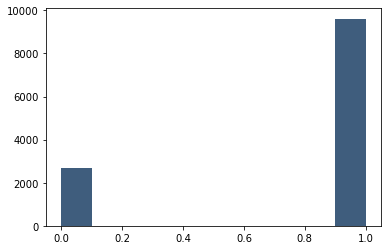

In [92]:
plt.hist(cluster_dataset.is_normal, color='#3F5D7D');

In [93]:
abnormal_dataset = cluster_dataset[cluster_dataset.is_normal == 0]
dataset = abnormal_dataset.drop(columns=["is_normal"])

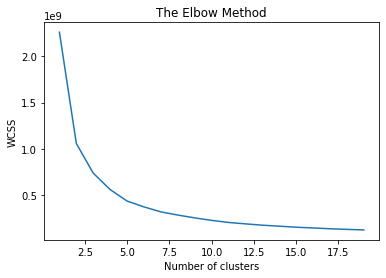

In [98]:
from sklearn.cluster import KMeans
wcss = []
total_test = 20
for i in range(1, total_test):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, total_test), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

## Training the K-Means model on the dataset

In [99]:
no_cluster = 5
kmeans = KMeans(n_clusters = no_cluster, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

## Change to 2 dimention for ploting

In [100]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')   # we can use kerenal to improve the perfomance
test_dataset = kpca.fit_transform(dataset)

## Visualising the clusters

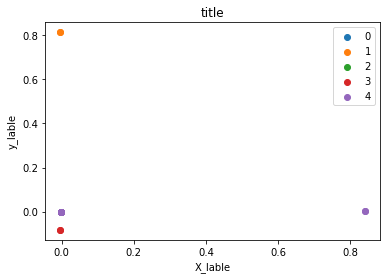

In [101]:
for i in range(no_cluster):
    plt.scatter(test_dataset[y_kmeans == i , 0] , test_dataset[y_kmeans == i , 1],  label = i)
    
plt.title('title')
plt.xlabel('X_lable')
plt.ylabel('y_lable')
plt.legend();

In [102]:
abnormal_dataset = abnormal_dataset.drop(columns=["is_normal"])
abnormal_dataset["Target"] = y_kmeans.tolist()

In [103]:
for i in range(no_cluster):
    print(i,": ",abnormal_dataset[abnormal_dataset.Target == i].shape)

0 :  (595, 16)
1 :  (449, 16)
2 :  (230, 16)
3 :  (698, 16)
4 :  (698, 16)


In [104]:
abnormal_dataset

,T_rms_mean,T_rms_std,T_zcr_mean,F_mel_mean,F_mel_std,F_mel_rms_mean,F_mel_rms_std,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_rolloff_mean,F_rolloff_std,Target
0,0.007860,0.002074,0.102903,0.019743,0.031406,0.004779,0.001395,0.802281,0.713340,0.053673,2167.104576,229.808004,16.586721,4715.355431,904.356103,4
1,0.008078,0.002118,0.099854,0.021287,0.032543,0.004913,0.001418,0.792222,0.819079,0.050359,2075.277426,331.266060,16.140419,4427.216454,1135.671097,1
2,0.008086,0.002081,0.097779,0.021716,0.032256,0.004922,0.001387,0.754520,0.851026,0.048603,2035.549836,383.531527,16.244304,4330.945487,1236.717933,1
3,0.007584,0.002217,0.115414,0.020680,0.029519,0.004609,0.001474,0.671063,0.801823,0.068693,2124.175475,222.712141,15.834551,4717.976238,804.476273,4
4,0.007901,0.002068,0.106082,0.020375,0.031433,0.004804,0.001385,0.803645,0.741051,0.056124,2163.299179,224.286498,16.325567,4720.746805,883.855629,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,0.004244,0.001999,0.084571,0.011615,0.021015,0.002568,0.001290,0.404212,0.591781,0.031840,1926.669120,316.946529,15.096742,3475.289537,1357.811852,0
11744,0.004025,0.001909,0.087065,0.011610,0.019867,0.002428,0.001243,0.375602,0.584723,0.030875,1835.228018,329.026106,14.737689,3184.255192,1332.617555,0
11745,0.004038,0.001959,0.084655,0.011643,0.020219,0.002436,0.001272,0.374538,0.587959,0.028881,1833.959663,320.134617,14.932735,3147.863419,1302.120388,0
11746,0.003980,0.002138,0.160599,0.012456,0.019225,0.002403,0.001372,0.283731,0.634960,0.103900,2175.607523,172.520212,14.440473,4950.179712,641.331941,4
